# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Cleaning and EDA

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [9]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [13]:
df[df['Owner'] == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [14]:
df_clean = df.drop(85)

In [15]:
df_clean.reset_index(drop=True, inplace=True)

In [16]:
df_clean['Owner'].unique()

array([0, 1], dtype=int64)

In [17]:
df_final = df_clean.drop(['Car_Name'], axis = 1)

In [18]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df_final['Current_Year'] = 2024

In [20]:
df_final['Car_Age'] = df_final['Current_Year'] - df_final['Year']

In [21]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [22]:
df_final.drop(['Year'], axis = 1, inplace = True)
df_final.drop(['Current_Year'], axis = 1, inplace = True)

In [23]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


<Axes: xlabel='Selling_Price'>

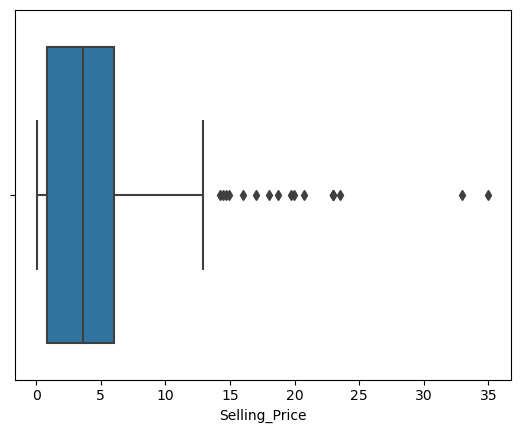

In [24]:
sns.boxplot(x = 'Selling_Price', data = df_final)

# Feature Selection

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


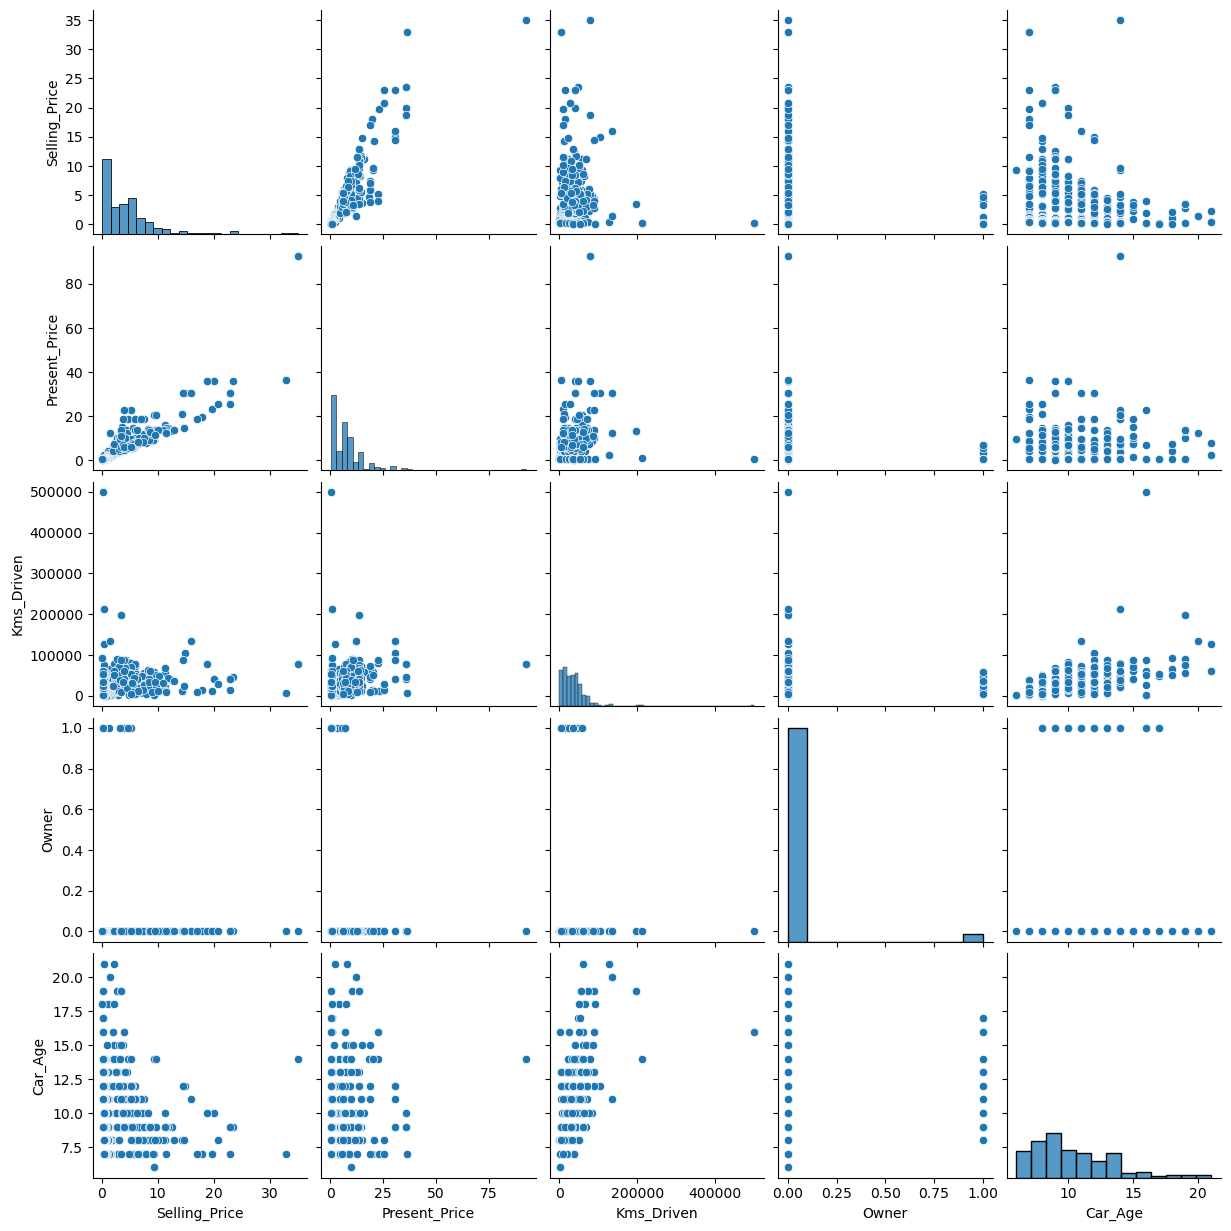

In [25]:
sns.pairplot(df_final)

In [26]:
print(df_final.groupby('Fuel_Type')['Selling_Price'].mean())

print(' ')

print(df_final.groupby('Seller_Type')['Selling_Price'].mean())

print(' ')

print(df_final.groupby('Transmission')['Selling_Price'].mean())

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.267395
Name: Selling_Price, dtype: float64
 
Seller_Type
Dealer        6.721692
Individual    0.855429
Name: Selling_Price, dtype: float64
 
Transmission
Automatic    9.597436
Manual       3.931992
Name: Selling_Price, dtype: float64


# Linear Regression

In [27]:
ols_formula = 'Selling_Price ~ Present_Price + Kms_Driven + Car_Age + C(Fuel_Type) + C(Transmission)'

OLS = ols(formula = ols_formula, data = df_final)

model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     353.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          5.17e-131
Time:                        18:19:05   Log-Likelihood:                -596.93
No. Observations:                 300   AIC:                             1208.
Df Residuals:                     293   BIC:                             1234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.1141      1.374      4.449      0.000       3.409       8.819
C(Fuel_Type)[T.Diesel]        2.1091      1.295      1.629      0.104      -0.439       4.658
C(Fuel_Type)[T.Petrol]        0.1573      1.273      0.124      0.902      -2.347       2.662
C(Transmission)[T.Manual]    -1.3531      0.331     -4.087      0.000      -2.005      -0.702
Present_Price                 0.4720      0.015     32.348      0.000       0.443       0.501
Kms_Driven                -5.561e-06   3.28e-06     -1.695      0.091    -1.2e-05    8.97e-07
Car_Age                      -0.4047      0.043     -9.390      0.000      -0.489      -0.320
==============================================================================
Omnibus:                       63.256   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.021
Skew:                           0.463   Prob(JB):                    4.77e-144
Kurtosis:                      10.207   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Fuel_Type` and `Kms_Driven` is showing p > 0.05. This requires further investigation

## Checking for Linearity, Normality, Variance and Multicollinearity

### Linearity

Text(0.5, 1.0, 'Car_Age and Selling_Price')

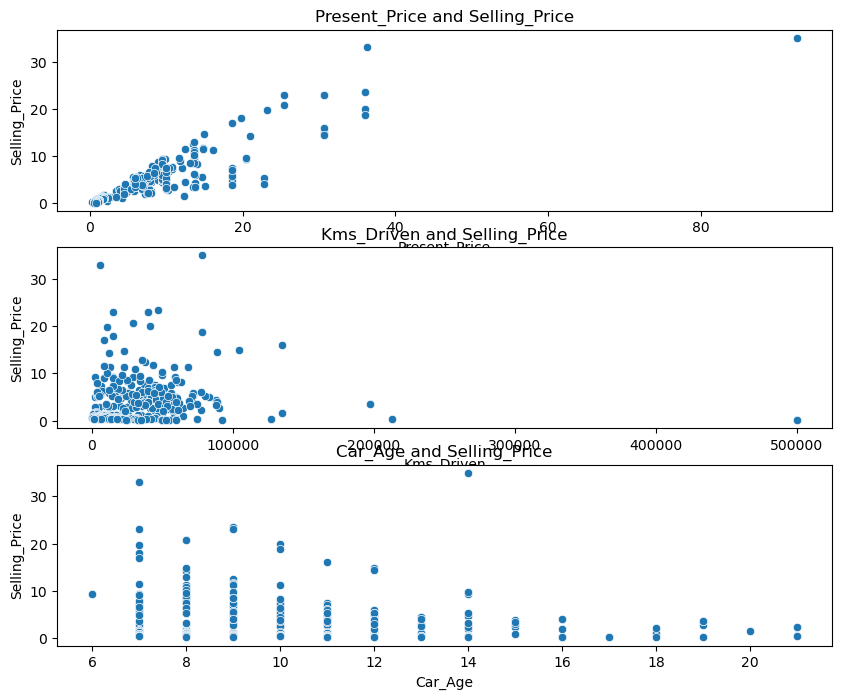

In [28]:
fig, axes = plt.subplots(3, 1, figsize = (10,8))
sns.scatterplot(x = df_final['Present_Price'], y = df_final['Selling_Price'],ax=axes[0])
axes[0].set_title("Present_Price and Selling_Price")

sns.scatterplot(x = df_final['Kms_Driven'], y = df_final['Selling_Price'],ax=axes[1])
axes[1].set_title("Kms_Driven and Selling_Price")

sns.scatterplot(x = df_final['Car_Age'], y = df_final['Selling_Price'],ax=axes[2])
axes[2].set_title("Car_Age and Selling_Price")

`Kms_Driven` not giving a linear relationship with `Selling_Price`

### Normality

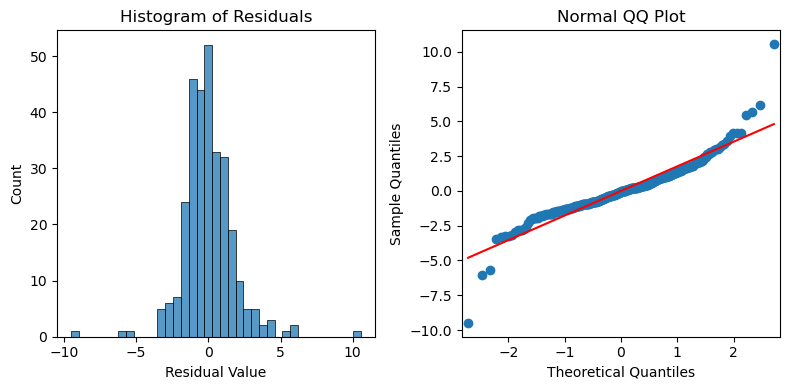

In [29]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))


sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")


sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

Normality condition is met

### Constant Variance

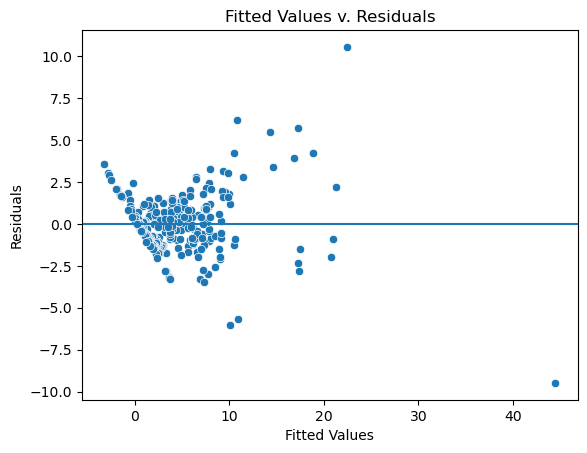

In [30]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)


fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

Constant Variance condition is met

### Multicollinearity

In [31]:
x = df_final[['Present_Price','Kms_Driven','Car_Age']]
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
df_vif = pd.DataFrame(vif, index=x.columns, columns = ['VIF'])
df_vif

,VIF
Present_Price,1.740309
Kms_Driven,2.446011
Car_Age,2.869329


No Multicollinearity

## Final Linear Regression Model

In [32]:
ols_formula = 'Selling_Price ~ Present_Price + Car_Age + C(Transmission)'

OLS = ols(formula = ols_formula, data = df_final)

model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     612.2
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.50e-126
Time:                        18:19:07   Log-Likelihood:                -617.14
No. Observations:                 300   AIC:                             1242.
Df Residuals:                     296   BIC:                             1257.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.5553      0.532     12.331      0.000       5.509       7.602
C(Transmission)[T.Manual]    -1.1264      0.348     -3.238      0.001      -1.811      -0.442
Present_Price                 0.5145      0.014     37.777      0.000       0.488       0.541
Car_Age                      -0.4643      0.039    -12.045      0.000      -0.540      -0.388
==============================================================================
Omnibus:                       61.850   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.181
Skew:                           0.118   Prob(JB):                    4.00e-223
Kurtosis:                      12.049   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Selection

In [33]:
df_new = pd.get_dummies(df_final, drop_first = True).astype(float)

In [34]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0.0,10.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,0.0,11.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,0.0,7.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,0.0,13.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,0.0,10.0,1.0,0.0,0.0,1.0


In [35]:
df_new.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.887060,0.033450,-0.098617,-0.235213,0.552027,-0.540245,-0.550655,-0.374967
Present_Price,0.887060,1.000000,0.190247,-0.092024,0.031704,0.479397,-0.471357,-0.525125,-0.338477
Kms_Driven,0.033450,0.190247,1.000000,-0.025926,0.512732,0.179291,-0.179752,-0.115421,-0.142764
Owner,-0.098617,-0.092024,-0.025926,1.000000,0.107434,-0.046424,0.048918,0.097331,0.071782
Car_Age,-0.235213,0.031704,0.512732,0.107434,1.000000,-0.060655,0.056154,0.028368,0.022614
Fuel_Type_Diesel,0.552027,0.479397,0.179291,-0.046424,-0.060655,1.000000,-0.979631,-0.349428,-0.104073
Fuel_Type_Petrol,-0.540245,-0.471357,-0.179752,0.048918,0.056154,-0.979631,1.000000,0.357269,0.096445
Seller_Type_Individual,-0.550655,-0.525125,-0.115421,0.097331,0.028368,-0.349428,0.357269,1.000000,0.075849
Transmission_Manual,-0.374967,-0.338477,-0.142764,0.071782,0.022614,-0.104073,0.096445,0.075849,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


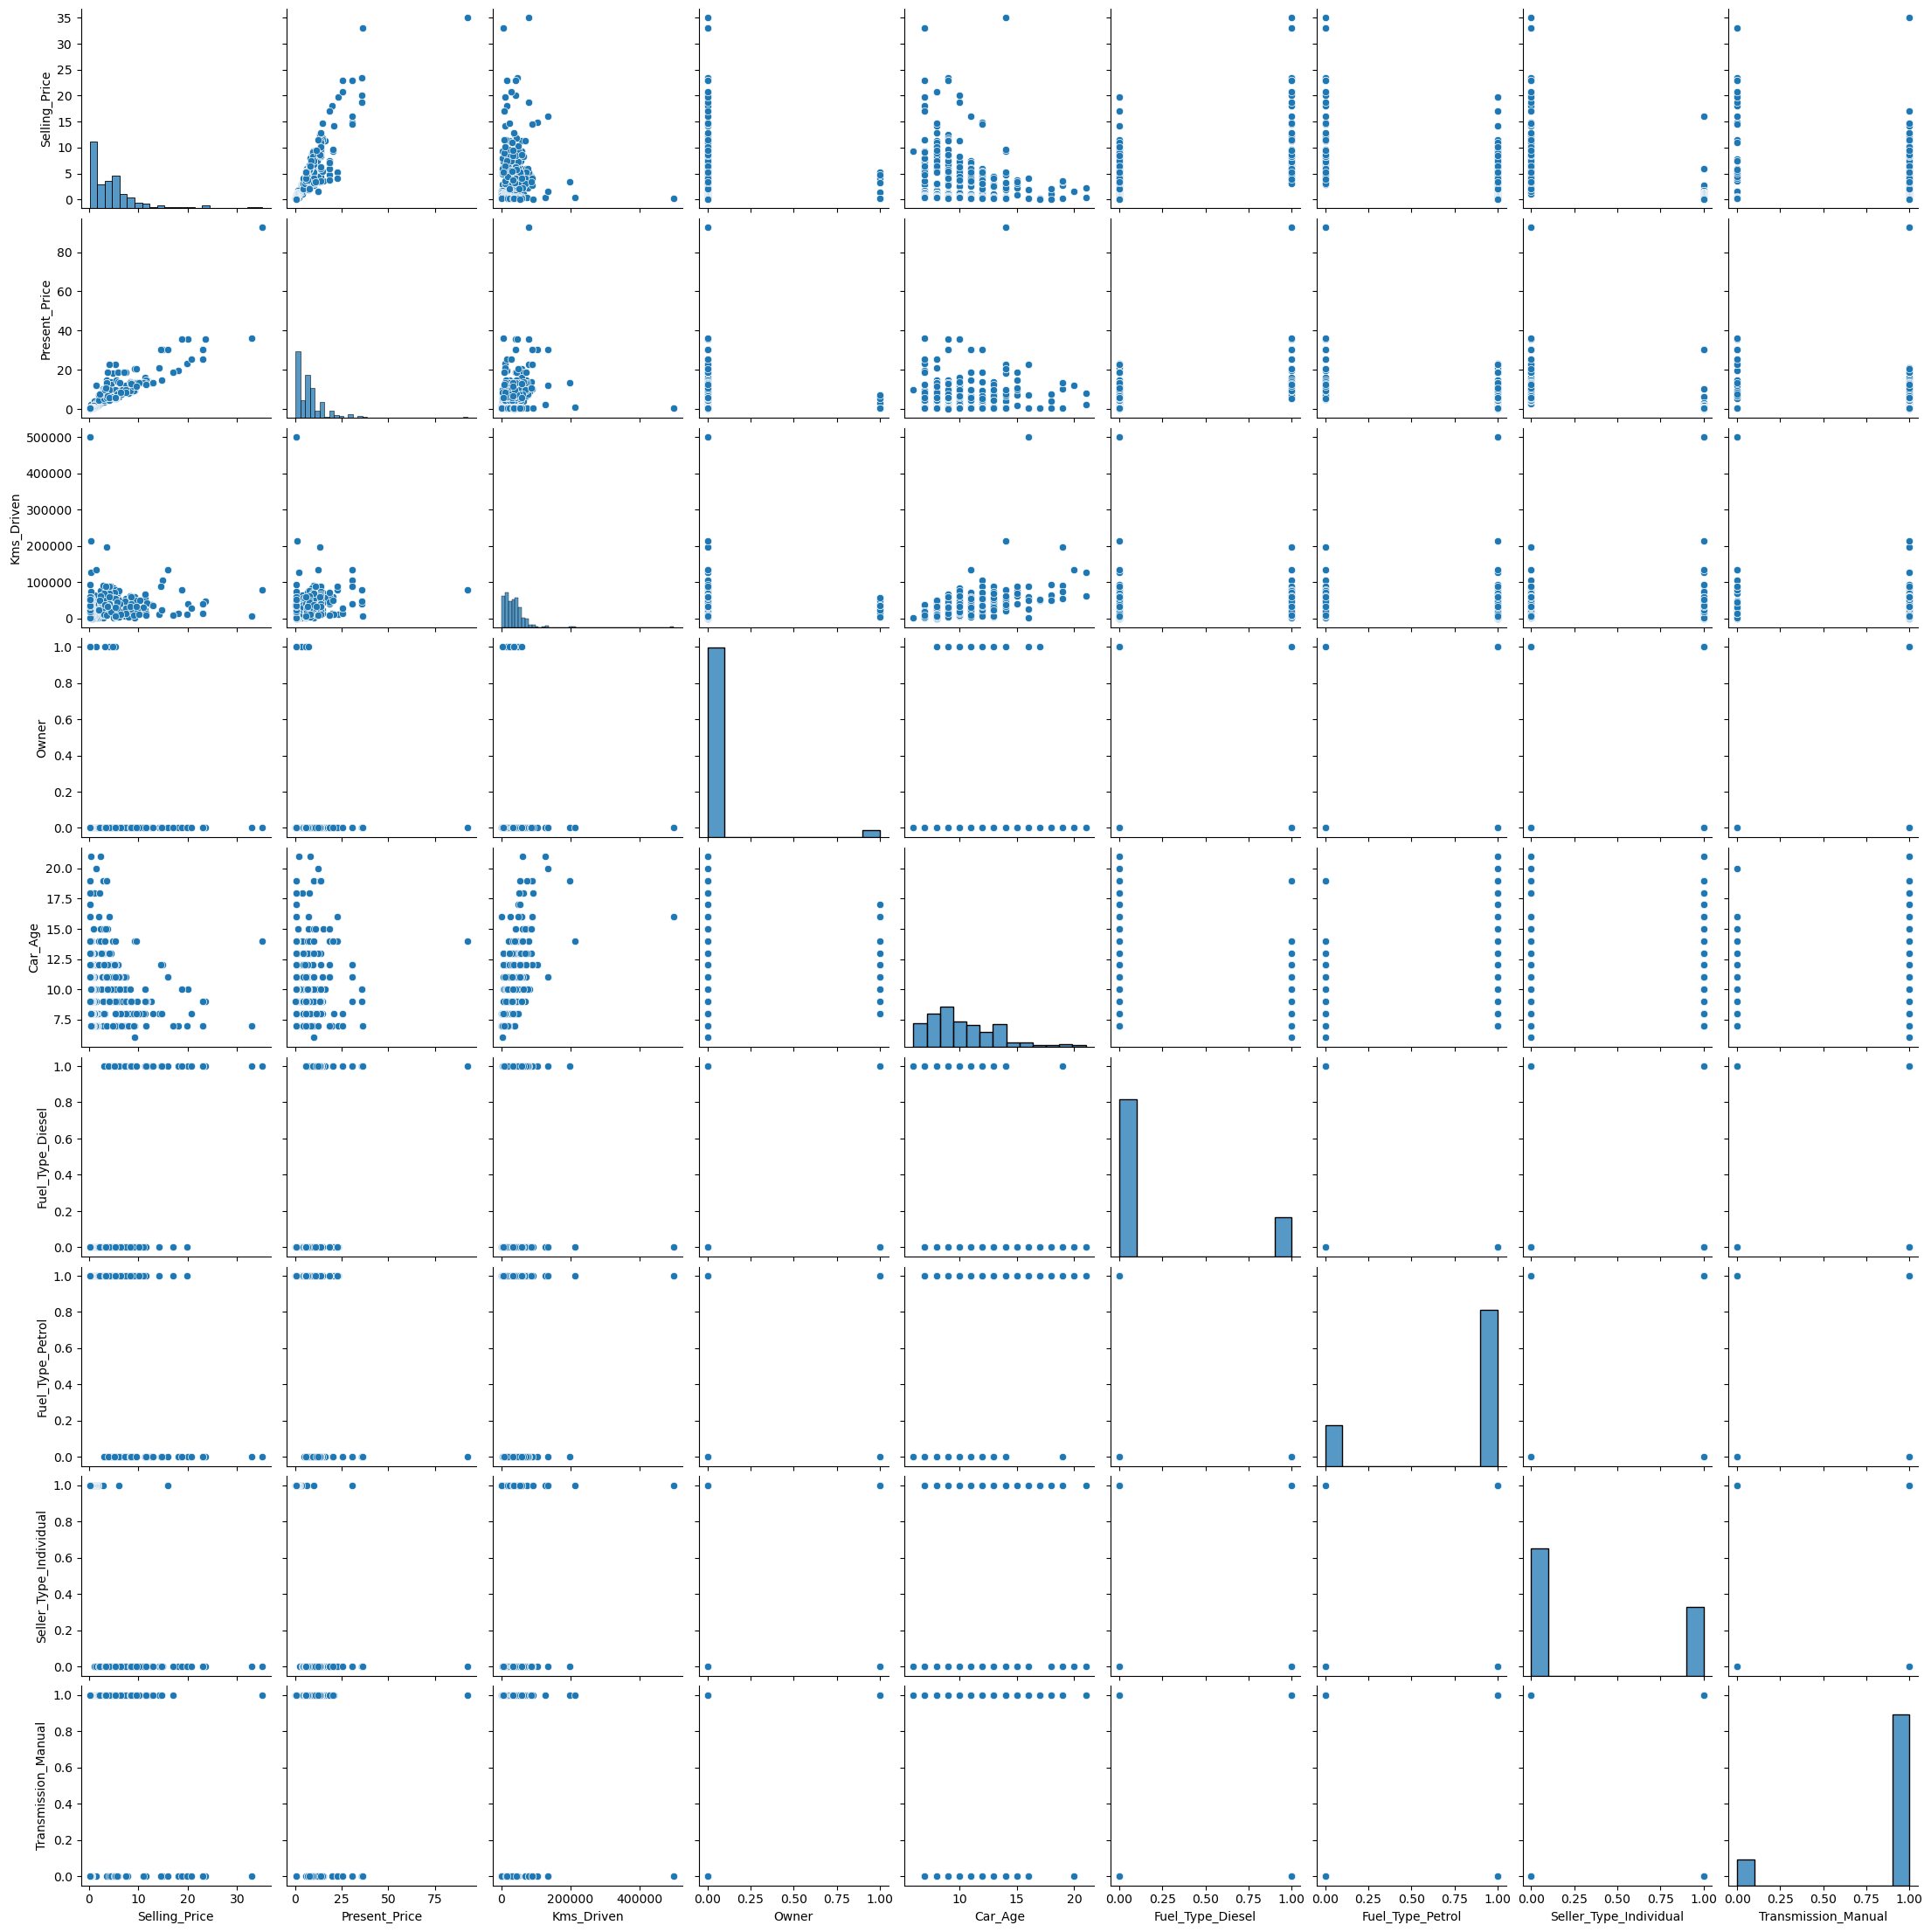

In [36]:
sns.pairplot(df_new)

<Axes: >

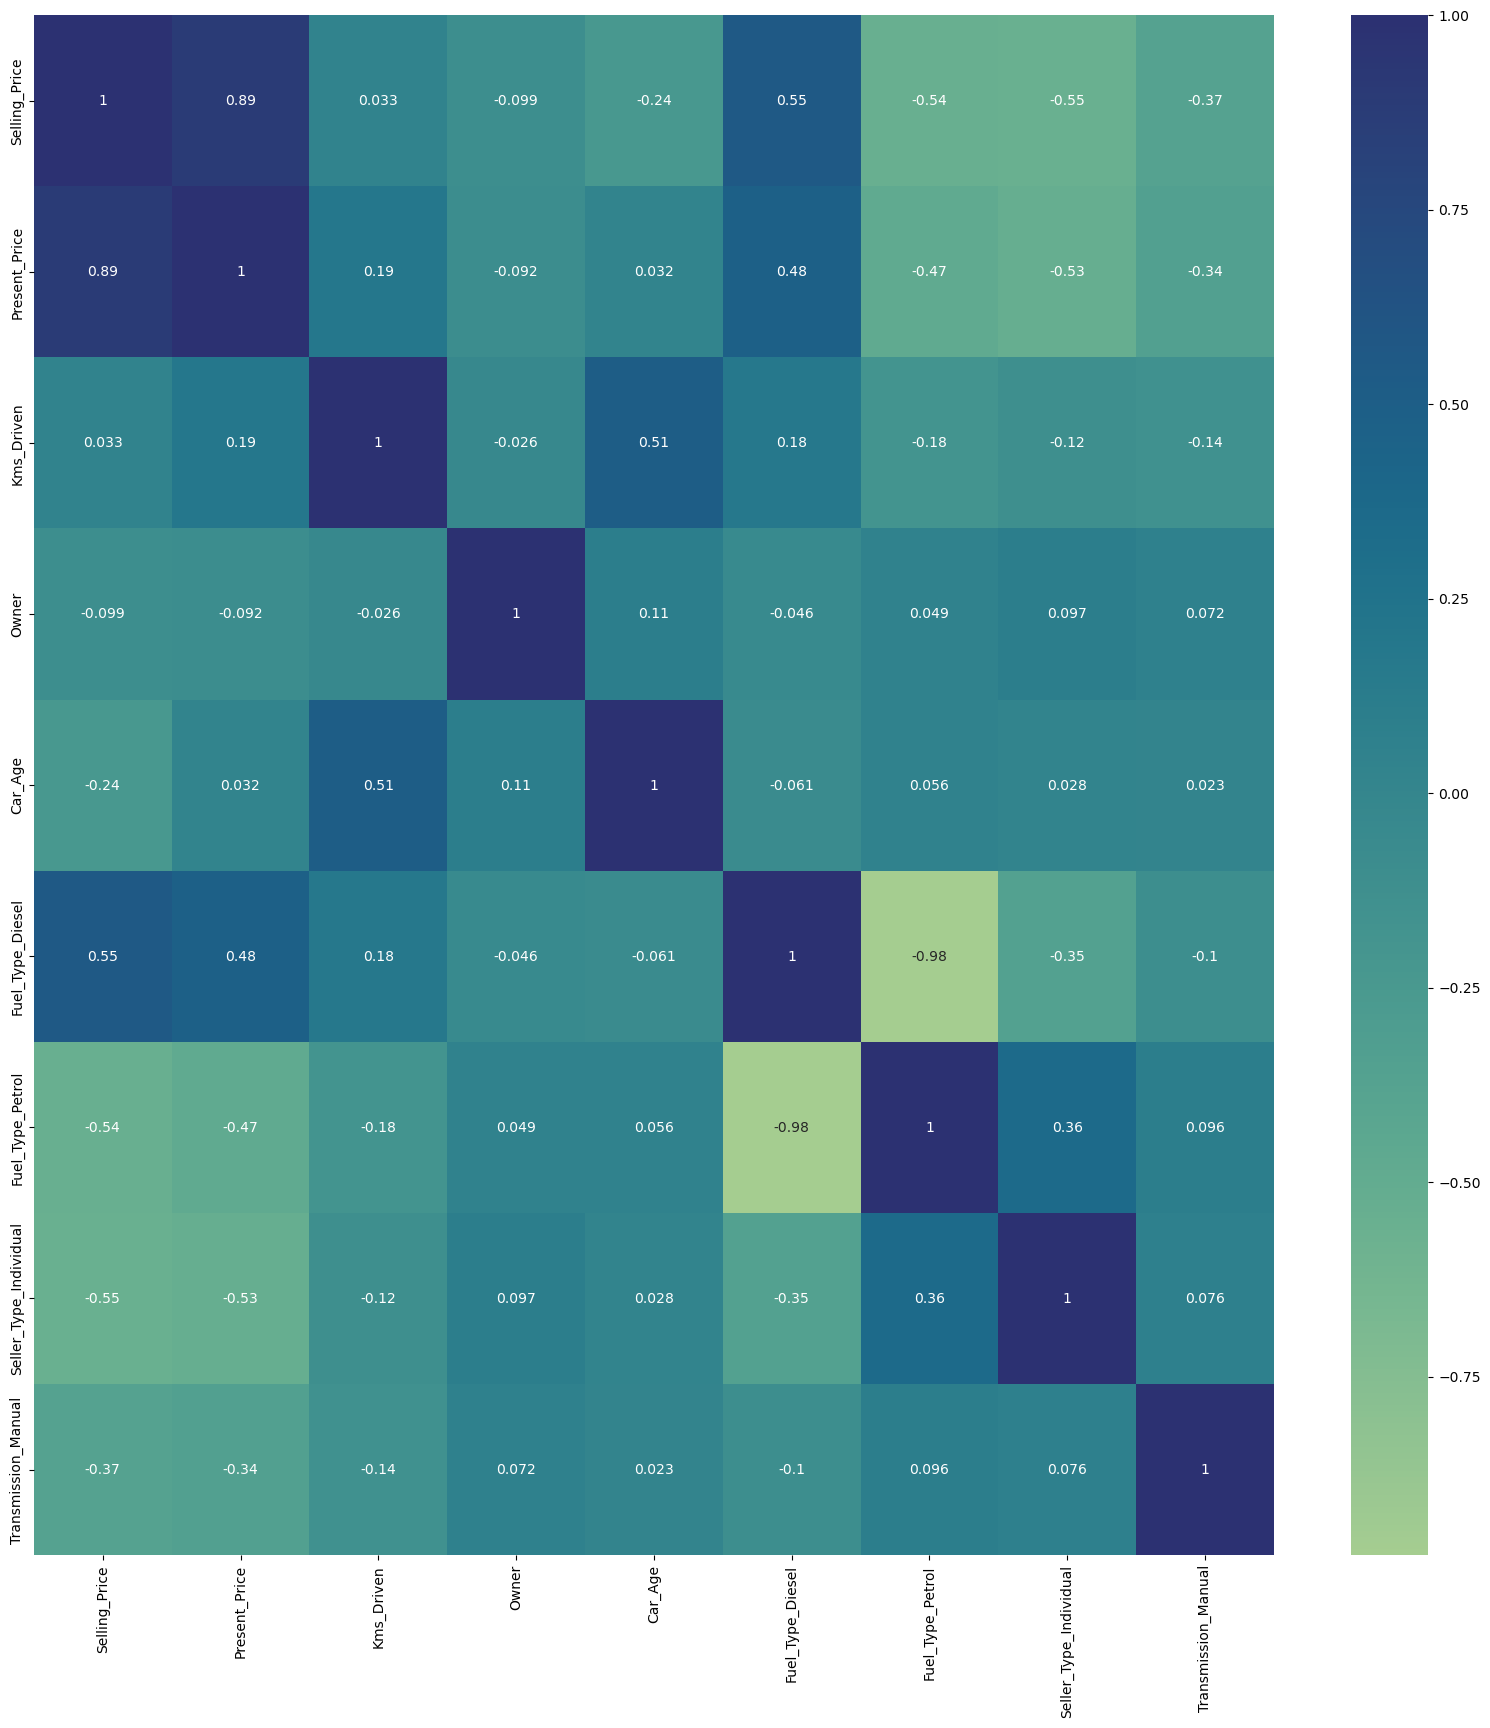

In [37]:
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(df_new.corr(), annot = True, cmap = 'crest')

From the given pairplot `Selling_Price` is:

Positively correlated with `Present_Price`.

Positively correlated with `Fuel_Type_Diesel`.

Negatively correlated with `Transmission_Manual`

In [38]:
X = df_new.drop(['Selling_Price'], axis = 1)
y = df_new['Selling_Price']

In [39]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000.0,0.0,10.0,0.0,1.0,0.0,1.0
1,9.54,43000.0,0.0,11.0,1.0,0.0,0.0,1.0
2,9.85,6900.0,0.0,7.0,0.0,1.0,0.0,1.0
3,4.15,5200.0,0.0,13.0,0.0,1.0,0.0,1.0
4,6.87,42450.0,0.0,10.0,1.0,0.0,0.0,1.0


In [40]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Random Forest Regression

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [42]:
rf = RandomForestRegressor(n_estimators=100) 

In [43]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
y_pred = rf.predict(X_test)

In [45]:
y_pred

array([ 5.1495,  0.1383,  6.8399,  4.9285,  4.7715,  0.3881,  7.3003,
        4.3945, 15.3593,  1.2128,  4.6405,  7.7709,  0.3433,  6.1115,
        3.1725,  5.959 ,  3.4076,  8.6481,  5.2735,  0.4355,  0.226 ,
        1.5531,  1.0485,  0.661 ,  6.959 ,  1.1577,  0.3162,  4.9655,
        7.3003,  9.1618, 21.5666, 15.1266,  7.5825,  1.095 ,  2.9395,
        0.3304,  0.3383,  0.263 ,  5.3655,  7.7252,  4.8645,  5.8921,
        5.2405,  5.5985,  4.9719,  0.7336,  9.2414, 21.5063,  6.885 ,
        6.7339,  3.005 ,  4.9835,  0.3816,  1.0989, 20.3876,  5.1175,
        0.425 ,  3.6135,  6.5195,  0.5773,  0.5074,  0.4459, 21.2511,
        4.2085,  5.6675,  2.9085,  6.1465,  1.276 ,  2.785 ,  3.236 ,
        0.5825,  3.4645,  4.7965,  4.8635,  0.4557])

In [46]:
r_square = metrics.r2_score(y_test,y_pred)
r_square

0.9236878628368816

C:\Users\Admin\AppData\Local\Temp\ipykernel_6932\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Selling_Price', ylabel='Density'>

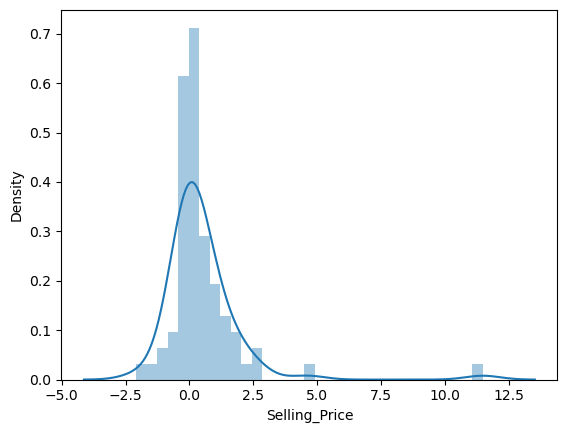

In [47]:
sns.distplot(y_test-y_pred)

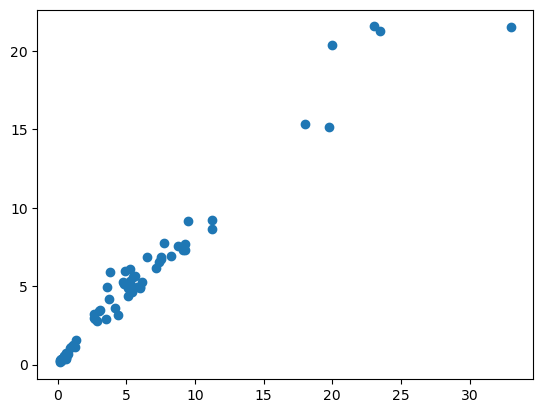

In [48]:
plt.scatter(y_test,y_pred)

# Final Conclusion

r_square of Linear Regression = 0.861

r_square of Random Forest Regression = 0.923

Therefor, r_square of Linear Regression < r_square of Random Forest Regression

This shows that a Random Forest Regressor is a better model to predict the `Selling_Price` of Cars.